In [1]:
import numpy as np
import umap
from fbpca import pca
from ipywidgets import interact, interact_manual
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.metrics import pairwise_distances
from heapq import nlargest
from scipy.stats import spearmanr

In [2]:
import warnings
import os
warnings.simplefilter('ignore')

os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample/bin')
from datatools import *
from dataset import *

os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample')

In [3]:
import csv
import os
from sklearn import preprocessing

def open_data(NAMESPACE, parent_dir='data/', delimiter = '\t', dimred=True, annos = []):

    filename = 'dimred' if dimred else 'full'
    with open(parent_dir+NAMESPACE+'/'+filename+'.txt') as f:
        reader = csv.reader(f, delimiter = delimiter)
        data = np.array(list(reader)).astype(float) #assumes clean data, no column names

    result = dataset(data, path=parent_dir+NAMESPACE+'/')


    for anno in annos: #search for the indicated annotation file
        if os.path.exists(parent_dir+NAMESPACE+'/'+anno+'.txt'):
            with open(parent_dir+NAMESPACE+'/'+anno+'.txt') as f:
                reader = csv.reader(f, delimiter = delimiter)
                labels = np.array(list(reader))
                labels = [x[0] for x in labels]
                result.data[anno] = labels
        else:
            print('WARNING: could not find annotation {}'.format(anno))


    #search for subsamples
    if os.path.exists(parent_dir+NAMESPACE+'/ft.txt'):
        result.load_subsample(parent_dir+NAMESPACE+'/ft.txt', name='ft', delimiter=delimiter)


    return(result)


In [4]:
def top_diffs(k=1):
    def F(x,y):
        diffs = np.absolute(np.array(x)-np.array(y))
        #print(diffs)
        topdiffs = nlargest(k, diffs)
        return(np.linalg.norm(topdiffs))
    return(F)
    

In [5]:
def spearman(x,y):
    return 1/spearmanr(np.array(x),np.array(y)).correlation

In [6]:
def trunc_euclidean(k=5):
    def F(x,y):
        return np.linalg.norm(np.array(x)[:k]-np.array(y)[:k])
    
    return(F)
    

In [144]:
zheng = open_data('zheng', annos=['patients','labels'])

In [145]:
zheng_sub = zheng.subset('patients','P1116')

In [146]:
zheng_sub.sort_values('labels')

computing distances...


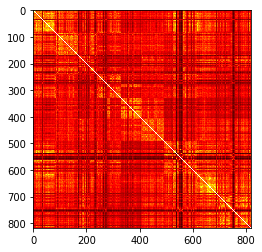

In [147]:
zheng_sub.heatmap()

computing distances...


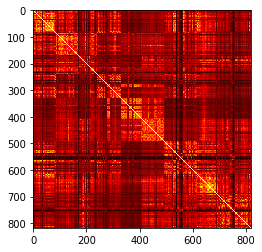

In [130]:
zheng_sub.heatmap(top_diffs(2))

computing distances...


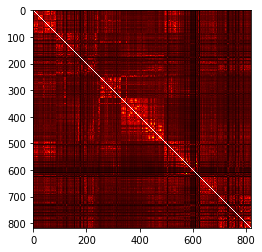

In [121]:
zheng_sub.heatmap(trunc_euclidean(20))

computing distances...


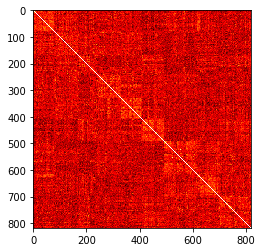

In [108]:
zheng_sub.heatmap(spearman)

In [13]:
pbmc = open_data('pbmc',annos=['labels'])
pbmc = pbmc.subsamples['ft']

In [14]:
pbmc.data = pbmc.data.iloc[:200,:]

In [15]:
pbmc.sort_values('labels')

In [16]:
pbmc.save('ft_200')

In [17]:
pbmc.grow()

making embedding
embedding size 20000
(200, 3)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMDAsIGRlc2NyaXB0aW9uPXUnTicsIG1heD0yMDAsIG1pbj0xKSwgRHJvcGRvd24oZGVzY3JpcHRpb249dSdjb2xvcicsIG/igKY=


computing distances...


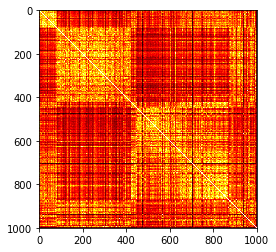

In [22]:
pbmc.heatmap()

computing distances...


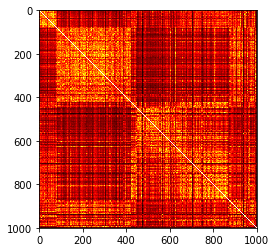

In [23]:
pbmc.heatmap(top_diffs(10))

In [1]:
pbmc.heatmap(trunc_euclidean(10))

NameError: name 'pbmc' is not defined